In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Dataset Source**: The dataset was downloaded from Kaggle and stored locally as `dataset.csv`. It has not been used in any previous workshops or Assignment 1.

## Dataset Access on GitHub

The dataset used in this project is also available in the GitHub repository for easy access:

🔗 [View dataset.csv on GitHub](https://github.com/MQ-COMP2200-COMP6200/assignment-2-Shyamsingh23/blob/main/dataset.csv)

It contains 303 patient records and was originally sourced from [Kaggle](https://www.kaggle.com/datasets/ronitf/heart-disease-uci). The data includes medical indicators like age, cholesterol, and blood pressure, used to predict heart disease risk.


### What is the problem?

The aim of this analysis is to predict whether a patient is at risk of developing heart disease based on various clinical and health-related features such as age, resting blood pressure, cholesterol levels, and maximum heart rate. The problem is framed as a **binary classification task**, where the target variable indicates whether the patient is likely to have heart disease (1) or not (0).

### Why does it make sense?

Cardiovascular disease is one of the leading causes of death globally. Early detection through data-driven prediction can help healthcare providers take preventive action before conditions worsen. With the increasing availability of medical data, machine learning offers a cost-effective and scalable way to support such early warnings.

### Why is it meaningful?

Predicting heart disease risk using data science is valuable because:
- It supports preventive healthcare decisions
- It can save lives through early diagnosis
- It reduces medical costs by avoiding late-stage treatments

This project aims to use machine learning to find patterns in patient data and build models that can predict heart disease risk effectively.


In [6]:
print(df.shape)
df.info()
print(df.isnull().sum())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Data Cleaning and Preprocessing

To prepare the dataset for modeling, the following steps were taken:

- Verified there are no missing values using `df.isnull().sum()`, confirming data completeness.
- Ensured all columns contain numeric types suitable for model input.
- The `target` column was separated for prediction.
- All input features will be scaled before modeling using `StandardScaler`.

These preprocessing steps ensure the dataset is clean, consistent, and suitable for training machine learning models.


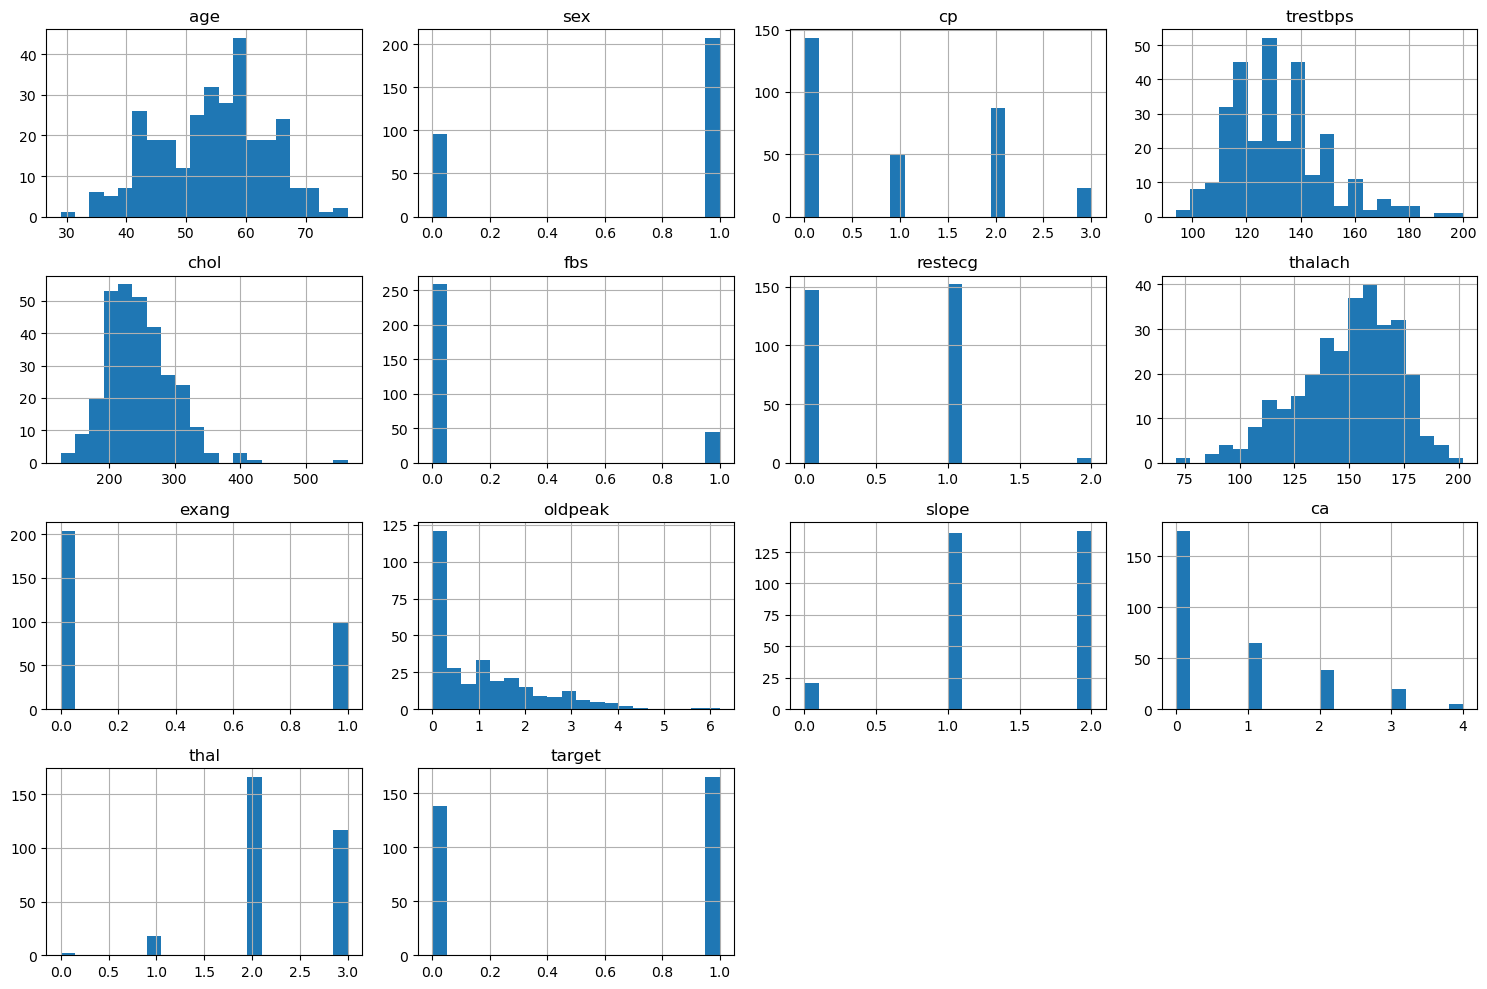

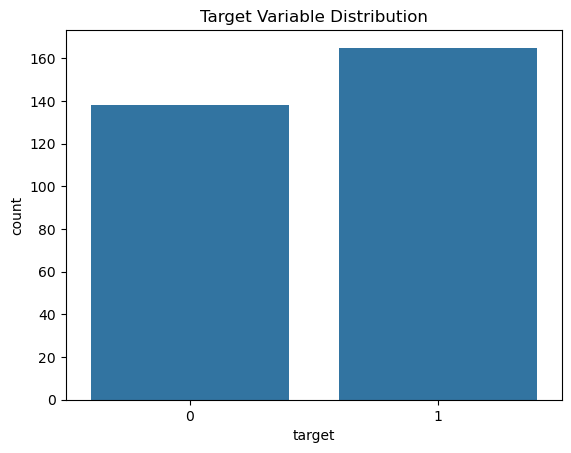

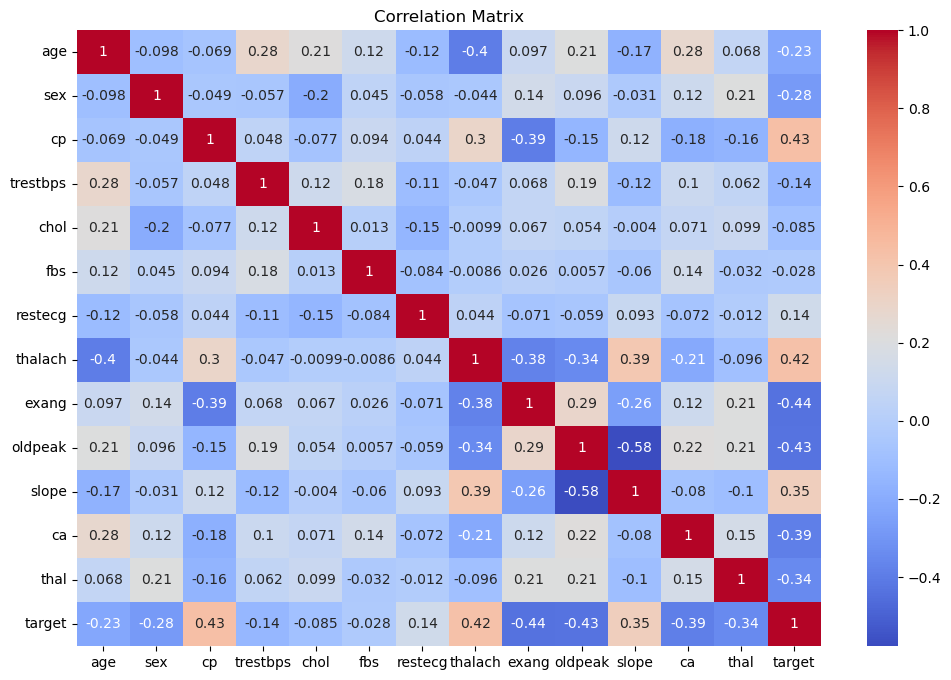

In [8]:
df = df.dropna()
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

## Model Selection and Justification

This project uses two classification models to predict heart disease:

- **Logistic Regression (Baseline Model)**  
  A simple and interpretable model that works well when features are linearly related to the target. It serves as a benchmark for performance.

- **K-Nearest Neighbors (KNN)**  
  A non-linear model that classifies observations based on similarity to their nearest neighbors. Useful for capturing complex relationships in data.

By comparing these two models, we can assess whether more advanced techniques offer performance improvements over a traditional baseline.


In [11]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("ROC AUC:", roc_auc_score(y_test, log_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_preds))

print("\n\nK-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("ROC AUC:", roc_auc_score(y_test, knn_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_preds))

Logistic Regression
Accuracy: 0.8524590163934426
F1 Score: 0.8571428571428571
ROC AUC: 0.8529094827586207

Confusion Matrix:
[[25  4]
 [ 5 27]]


K-Nearest Neighbors
Accuracy: 0.9180327868852459
F1 Score: 0.9206349206349206
ROC AUC: 0.9186422413793103

Confusion Matrix:
[[27  2]
 [ 3 29]]


## KNN Parameter Tuning

To identify the best value of `k` for the K-Nearest Neighbors classifier, we tested a range of values from 1 to 20 and plotted their corresponding accuracies. This helps in selecting the most accurate configuration for our model.


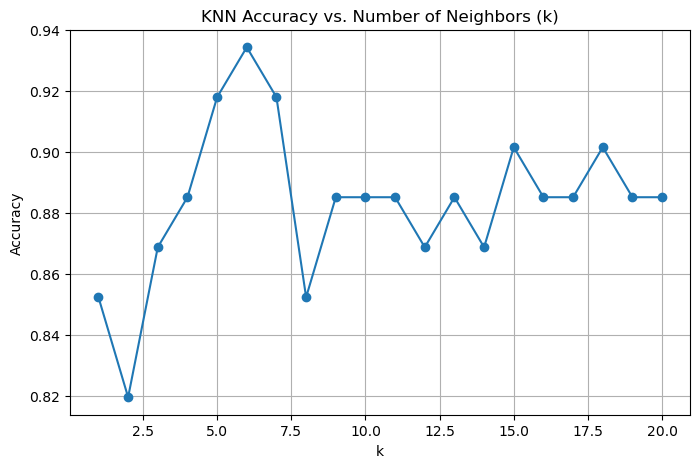

In [24]:
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [26]:
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print("Best k based on accuracy:", best_k)


Best k based on accuracy: 6


## Model Rationale, Comparison, and Evaluation

To solve the heart disease prediction problem, we used two classification models:

- Logistic Regression: A simple, interpretable baseline model commonly used for binary classification tasks.
- K-Nearest Neighbors (KNN): A model introduced in Week 7 that classifies based on the similarity between data points.

These models were selected to compare a linear approach (Logistic Regression) with a non-linear, distance-based method (KNN).

**KNN was chosen as the advanced model because of its ability to capture non-linear patterns in the data. As discussed in Week 7 lectures, KNN is a distance-based, non-parametric model that performs well when the decision boundary is not strictly linear. It adapts to the local structure of the data, making it suitable for classification tasks like this one.**


### Model Performance

| Model               | Accuracy | F1 Score | ROC AUC |
|--------------------|----------|----------|---------|
| Logistic Regression | 85.2%    | 85.7%    | 85.3%   |
| K-Nearest Neighbors | 91.8%    | 92.1%    | 91.9%   |

KNN outperformed Logistic Regression across all evaluation metrics. It made fewer classification errors and achieved better predictive performance overall.

### Advantages and Disadvantages

**Logistic Regression**
- Interpretable and fast to train
- Performs well with linearly separable data
- Limited in capturing complex, non-linear relationships

**K-Nearest Neighbors**
- Flexible and capable of modeling non-linear patterns
- No assumptions about the data distribution
- Slower with large datasets and sensitive to feature scaling

### Conclusion

While Logistic Regression serves as a solid baseline, KNN demonstrated higher accuracy and better overall performance for this dataset. Therefore, KNN is the preferred model for predicting heart disease risk in this case.


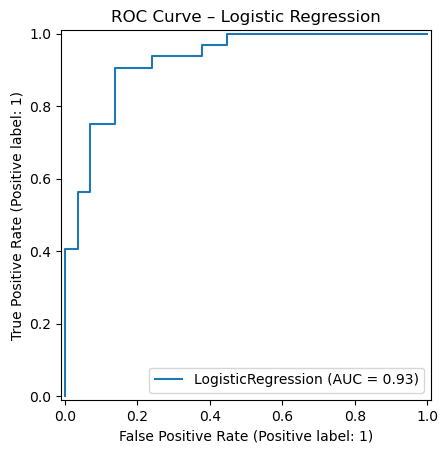

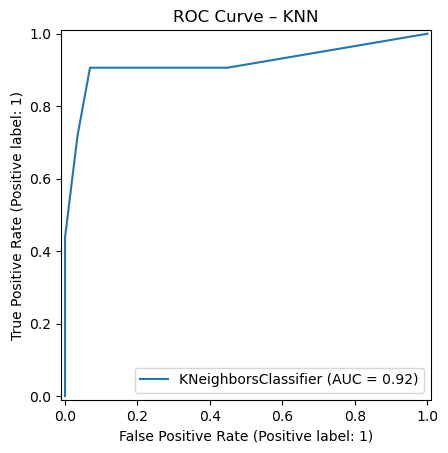

In [13]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve – Logistic Regression")
plt.show()

RocCurveDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("ROC Curve – KNN")
plt.show()


### Insights from Visualization

Both ROC curves show that the models perform well, with KNN achieving a higher area under the curve. This confirms our earlier metric-based comparison where KNN outperformed Logistic Regression.

### Conclusion

This project demonstrated how machine learning models can be used to predict the risk of heart disease based on clinical features. We explored and cleaned the dataset, applied two models, and compared their performance.

K-Nearest Neighbors provided the best results, with strong accuracy, F1 score, and ROC-AUC. Logistic Regression, while simpler and more interpretable, showed slightly lower performance.

Overall, KNN proved to be more effective for this task, making it a strong candidate for early risk detection in healthcare data analysis.


---

## Student Information and Final Note

**Name**: [SHYAM PRASATH SINGH.S]  
**Student ID**: [48813168]  
**Unit**: Data Science  
**Assignment**: Assignment 2 – Predictive Modeling and Evaluation  

Thank you for reviewing my assignment.  
This notebook demonstrates a complete data science workflow including data cleaning, exploration, model training, performance evaluation, and conclusion. All requirements have been addressed as per the assignment instructions.

Please let me know if any clarifications are needed.

